In [33]:
# delete everything before 1800
#for duplicate words instead of getting rid of duplicates add up their match counts and thats the new match count for that word
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
sns.set(color_codes = True)
%matplotlib inline

## Loading the data

In [34]:
#df = pd.read_csv('C:\\Users\\Aaron\\Desktop\\ngram project\\words.data', delim_whitespace = True, header = None)

In [36]:
df = pd.read_csv('C:\\Users\\Aaron\\Desktop\\ngram project\\googlebooks-eng-all-1gram-20120701-c.data', delim_whitespace = True, header = None)

In [4]:
# df = pd.read_csv('D:\\Linguistic Research\\Ngrams\\googlebooks-eng-all-1gram-20120701-c\\googlebooks-eng-all-1gram-20120701-c.data', delim_whitespace = True, header = None)

# Organizing the data and data frame

In [37]:
df.tail()

,0,1,2,3
97689320,центры_NUM,1995,7,3
97689321,центры_NUM,1998,1,1
97689322,центры_NUM,1999,5,3
97689323,центры_NUM,2003,1,1
97689324,центры_NUM,2008,1,1


In [38]:
col_name = ['Word', 'Year', 'Match Count', 'Volume Count']
df.columns = col_name

In [39]:
df.head()

,Word,Year,Match Count,Volume Count
0,C'ape,1804,1,1
1,C'ape,1821,1,1
2,C'ape,1826,1,1
3,C'ape,1838,2,2
4,C'ape,1844,1,1


In [40]:
print(df.shape)

(97689325, 4)


In [41]:
df_sorted = df.sort_values('Year')

In [42]:
df_sorted.head()

,Word,Year,Match Count,Volume Count
23411598,complete_ADJ,1505,3,1
33924189,corner,1505,8,1
19220922,cf_VERB,1505,1,1
88880196,constitute,1505,1,1
78338517,conçut,1505,1,1


## Getting rid of unwanted data 

In [43]:
# gets rid of volume under 2
df_volume = df_sorted[df_sorted['Volume Count'] > 1]
print(df_volume.shape)

(64413655, 4)


In [44]:
df_volume.head()

,Word,Year,Match Count,Volume Count
81521094,conquered_VERB,1568,7,2
46536213,carte_NOUN,1568,2,2
94251072,credo_NOUN,1568,2,2
51396029,Coel,1568,2,2
3830598,comfort,1568,4,2


In [45]:
df_volume.isna().sum()

Word            0
Year            0
Match Count     0
Volume Count    0
dtype: int64

In [14]:
df_volume = df_volume.dropna()

In [46]:
# n gives an error here for some reason go back and check why
df_volume = df_volume.loc[~df_volume['Word'].str.contains(r'_')]

In [47]:
print(df_volume.shape)

(27939015, 4)


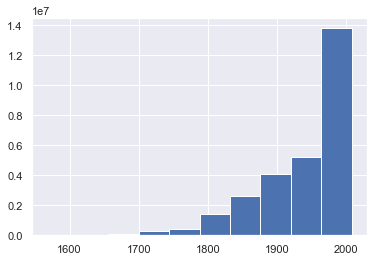

In [48]:
df_volume['Year'].hist()

In [49]:
#gets rid of numbers rows with numbers in the wortds
df_num = df_volume[~df_volume.Word.str.contains(r'\d')]
df_num

,Word,Year,Match Count,Volume Count
51396029,Coel,1568,2,2
3830598,comfort,1568,4,2
6390883,Christe,1568,10,2
43801588,Constantius,1568,2,2
67352130,cognoverunt,1568,2,2
...,...,...,...,...
39053367,craneo,2008,27,18
92504353,complexités,2008,18,15
39053211,crambook,2008,2,2
39053174,craj,2008,3,3


In [50]:
#df_num.iloc[48]

In [51]:
df_done = df_num[~df_num.Word.str.contains("[→, !, @, #, $, %, ^, &, *, (, }, +, =, |, \, /, ?, <, >, ~, .]")]
df_done

,Word,Year,Match Count,Volume Count
51396029,Coel,1568,2,2
3830598,comfort,1568,4,2
6390883,Christe,1568,10,2
43801588,Constantius,1568,2,2
67352130,cognoverunt,1568,2,2
...,...,...,...,...
39053367,craneo,2008,27,18
92504353,complexités,2008,18,15
39053211,crambook,2008,2,2
39053174,craj,2008,3,3


In [53]:
df_done.tail(20)

,Word,Year,Match Count,Volume Count
39047088,coteroporary,2008,7,7
39054953,credideris,2008,14,14
39054268,creatinephosphokinase,2008,3,2
554431,Chatawa,2008,9,3
39055362,criedout,2008,5,5
554327,Chasteness,2008,23,19
39055297,cricoidectomy,2008,5,4
39053866,cratewood,2008,2,2
92504488,complimentaries,2008,49,19
39052163,cpxA,2008,13,6


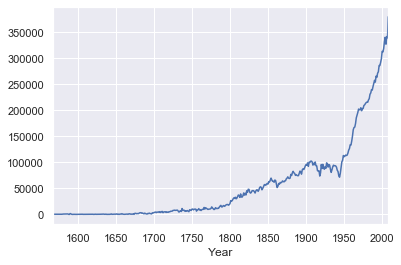

In [54]:
%matplotlib inline
df_done.groupby('Year').size().plot()

In [55]:
# come back to this to split the data for faster run times
#from multiprocessing import Pool

#num_partitions = 5 #number of partitions to split dataframe
#num_cores = 6 #number of cores on your machine

## finidng the frequency

In [56]:
# droping the volume count so that we can make 1s and 0s for the words and years
#df_done = df_done.drop(['Volume Count', 'Match Count'], axis=1)
#df_done

In [57]:
len(df_done)

24280497

In [58]:
df_done.dtypes

Word            object
Year             int64
Match Count      int64
Volume Count     int64
dtype: object

In [59]:
df_year = df_done.groupby('Year').size()
df_year.head()

Year
1568    364
1579    339
1581    711
1587    907
1588    112
dtype: int64

In [60]:
df_year = pd.DataFrame(df_year)
df_year

,0
Year,
1568,364
1579,339
1581,711
1587,907
1588,112
...,...
2004,340808
2005,327459
2006,342082


In [61]:
df_year = df_year.reset_index()
df_year

,Year,0
0,1568,364
1,1579,339
2,1581,711
3,1587,907
4,1588,112
...,...,...
387,2004,340808
388,2005,327459
389,2006,342082
390,2007,339790


In [62]:
export_df = pd.DataFrame(df_year)

In [63]:
export_df.to_excel (r'C:\Users\Aaron\Desktop\ngram project\Frequency for C.xlsx', index = False, header=True)

In [31]:
#export_df.to_excel (r'D:\Linguistic Research\Ngrams\googlebooks-eng-all-1gram-20120701-c\Frquency for C.xlsx', index = False, header=True)

FileCreateError: [Errno 2] No such file or directory: 'D:\\Linguistic Research\\Ngrams\\googlebooks-eng-all-1gram-20120701-c\\Frquency for C.xlsx'

## ---------- stop at this point_____________Make the data set numerical

In [ ]:
# X = df_done.drop("")

In [ ]:
#df_done['Volume Count'].value_counts()

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Word", "Year"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
# transformed_X is the new version with all numbers
transformed_X = transformer.fit_transform(df_done)
transformed_X